# **Imports**

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

from tensorflow.keras import datasets, layers, models # type: ignore

import matplotlib.pyplot as plt

import numpy as np

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## **Importing CIFAR Dataset**

In [13]:
# This has 60,000 32x32 color images with 10 classes and 6000 images for each class.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### **Normalizing Data**

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## **Class Names**

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## **Show Image**

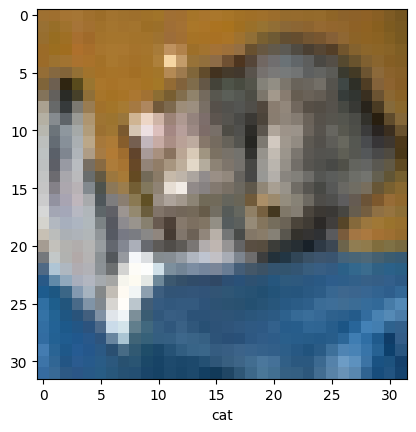

In [16]:
img_selector = 0

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)

plt.xlabel(class_names[test_labels[img_selector][0]])

plt.show()

# **Building Model**

In [17]:
model = models.Sequential()

## **Convoluted Layers**

In [18]:
model.add(layers.Conv2D(30, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(60, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(60, (3, 3), activation= 'relu'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 60)        16260     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 60)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 60)          32460     
                                                                 
Total params: 49,560
Trainable params: 49,560
Non-trai

## **Dense Layers**

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(50, activation= 'relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 30)        840       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 60)        16260     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 60)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 60)          32460     
                                                                 
 flatten_1 (Flatten)         (None, 960)              

# **Compile Model**

In [22]:
model.compile(  optimizer= 'adam',
                loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
                metrics= ['accuracy'])

history = model.fit(train_images, train_labels, epochs= 50, validation_data=(test_images, test_labels), verbose= 1)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5671 - accuracy: 0.4219 - val_loss: 1.3785 - val_accuracy: 0.5079
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1923 - accuracy: 0.5764 - val_loss: 1.1764 - val_accuracy: 0.5852
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0352 - accuracy: 0.6337 - val_loss: 1.0403 - val_accuracy: 0.6324
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9340 - accuracy: 0.6704 - val_loss: 0.9539 - val_accuracy: 0.6663
Epoch 5/10
1236/1563 [======================>.......] - ETA: 4s - loss: 0.8501 - accuracy: 0.7008

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'{test_loss:.2f} | {test_acc:.2f}')

313/313 - 1s - loss: 1.7996 - accuracy: 0.6757 - 1s/epoch - 4ms/step
1.80 | 0.68


# **Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

augmented_history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs= 50, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5887 - accuracy: 0.4583 - val_loss: 1.2329 - val_accuracy: 0.5883
Epoch 2/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3971 - accuracy: 0.5042 - val_loss: 1.0742 - val_accuracy: 0.6338
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3341 - accuracy: 0.5303 - val_loss: 1.1301 - val_accuracy: 0.6185
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2856 - accuracy: 0.5454 - val_loss: 1.0949 - val_accuracy: 0.6249
Epoch 5/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2567 - accuracy: 0.5565 - val_loss: 1.0581 - val_accuracy: 0.6394
Epoch 6/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2383 - accuracy: 0.5650 - val_loss: 1.0146 - val_accuracy: 0.6480
Epoch 7/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2124 - accuracy: 0.5699 - val_loss: 0.9960 -

# **Making Predictions**

313/313 [==============================] - 1s 4ms/step


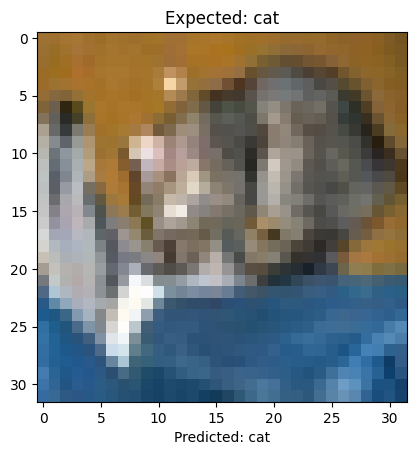

In [ ]:
predictions = model.predict(test_images)

img_selector = 0

plt.imshow(test_images[img_selector], cmap= plt.cm.binary)
plt.title('Expected: '+ class_names[test_labels[img_selector][0]])
plt.xlabel('Predicted: '+ class_names[np.argmax(predictions[img_selector])])

plt.show()